In [112]:
import numpy as np

class Logistic():

    def __init__(self, lr=0.001, no_of_it=1000):
        self.lr = lr
        self.no_of_it = no_of_it
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        self.m, self.n = X.shape  # no of rows = m, no of columns = n
        self.weights = np.zeros(self.n)
        self.bias = 0

        total_loss = 1e-5
        prev_loss = 0

        for i in range(self.no_of_it):
            self.update(X, Y)  
            self.y_pred = self.predict(X)
            current_loss = - (1/self.m) * np.sum(Y * np.log(self.y_pred + 1e-5) + (1 - Y) * np.log(1 - self.y_pred + 1e-5))

            if i > 0 and (current_loss - prev_loss) < total_loss:
                break

            prev_loss = current_loss

    def update(self, X, Y):
        y_pred = self.predict(X)

        dw = (1/self.m) * np.dot(X.T, (y_pred - Y))
        db = (1/self.m) * np.sum(y_pred - Y)

        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def predict(self, X):
        y_pred = 1 / (1 + np.exp(-(X.dot(self.weights) + self.bias)))
        return np.where(y_pred > 0.5, 1, 0)



In [2]:
def standardized(X):
    num_samples = len(X)
    num_features = len(X[0])

    means = [0] * num_features
    std_devs = [0] * num_features

    for j in range(num_features):
        feature_sum = sum(X[i][j] for i in range(num_samples))
        means[j] = feature_sum / num_samples

    for j in range(num_features):
        variance_sum = sum((X[i][j] - means[j]) ** 2 for i in range(num_samples))
        variance = variance_sum / num_samples
        std_devs[j] = variance ** 0.5

    std_devs = [1 if sd == 0 else sd for sd in std_devs]

    standardized_data = [
        [(X[i][j] - means[j]) / std_devs[j] for j in range(num_features)]
        for i in range(num_samples)
    ]

    return standardized_data


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [25]:
df = pd.read_csv('diabetes.csv')

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
df.describe()['Outcome']

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [29]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [30]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [31]:
X = df.iloc[:,:-1]

In [32]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [33]:
Y = df.iloc[:,-1]

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_stan = scaler.fit_transform(X)

In [101]:
X_train, X_test,Y_train,Y_test = train_test_split(X_stan,Y,test_size=0.25,random_state=0)

In [102]:
model = Logistic()

In [103]:
model.fit(X_train,Y_train)

In [104]:
print("Weights:",model.weights[0])
print("Bias:",model.bias)

Weights: 7.874342661355811e-05
Bias: -5.9027777777777746e-05


In [105]:
from sklearn.metrics import accuracy_score

In [106]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [107]:
print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  0.7534722222222222


In [108]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [109]:
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7552083333333334


In [110]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\anask\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


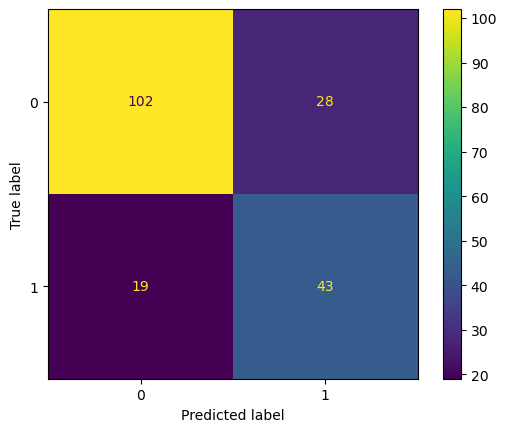

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
